<a href="https://colab.research.google.com/github/sridharsakkari/TelecomChurn/blob/master/Telecom_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/sridharsakkari/TelecomChurn.git

Cloning into 'TelecomChurn'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Import the dataset to analyse the influencing attributes that might likely to make customers to churn. we have 3 dataset consists of various information about the customer demographics and spending behaviour. 

In [4]:
churn_data = pd.read_csv('/content/TelecomChurn/churn_data.csv',delimiter = ',',index_col= 0)

In [5]:
churn_data.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
customer_data = pd.read_csv('/content/TelecomChurn/customer_data.csv',delimiter = ',',index_col = 0)
customer_data.head()

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


In [7]:
internet_data = pd.read_csv('/content/TelecomChurn/internet_data.csv',delimiter = ',',index_col = 0)
internet_data.head()

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,,
7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,No,Fiber optic,No,No,No,No,No,No


Merge all three datasets

In [97]:
data = pd.concat((customer_data,internet_data,churn_data),axis = 1)
data_copy = data.copy()

In [86]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   InternetService   7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  tenure            7043 non-null   int64  
 13  PhoneService      7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

It can be observed the dataset is a mix of categorical and numerical variables. To build a machine learning model, all attributes shall be numeric. Before converting the categorical variables to their corresponding numeric variables, further pre-processing of the data is performed. 

In [98]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'],errors = 'coerce')

In [89]:
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [99]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

In [91]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [100]:
data_copy = data

In [197]:
data = data_copy

In [198]:
def check_categorical(df):
    uniq_val = {}
    for i in df.columns:
        
        if df[i].dtype == 'object':
            
            uniq_val[i] = len(df[i].unique())
            
    return uniq_val
            

uniq_elements = check_categorical(data)
        

In [199]:
def two_var_cat(df,dict_):

  for key,value in dict_.items():
    

    if value == 2:

      cols = df[key].unique()
      df[key] = df[key].map({cols[0]:0,cols[1]:1})

    elif value >= 3:
      cols = pd.get_dummies(df[key],drop_first=True,prefix=key)
      df = pd.concat((df,cols),axis = 1)
      df.drop(key,inplace = True,axis = 1)
  
  

  return df



In [200]:
data_new = two_var_cat(data,uniq_elements)

In [201]:
output_data = data_new['Churn']

In [202]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   uint8  

In [203]:
continuous_variables = ['MonthlyCharges','TotalCharges','tenure','SeniorCitizen','Churn']

data_new[continuous_variables].describe(percentiles = [0.25,0.50,0.75,0.90,0.95,0.99]) 

,MonthlyCharges,TotalCharges,tenure,SeniorCitizen,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2283.300441,32.371149,0.162147,0.265370
std,30.090047,2265.000258,24.559481,0.368612,0.441561
min,18.250000,18.800000,0.000000,0.000000,0.000000
25%,35.500000,402.225000,9.000000,0.000000,0.000000
50%,70.350000,1400.550000,29.000000,0.000000,0.000000
75%,89.850000,3786.600000,55.000000,0.000000,1.000000
90%,102.600000,5973.690000,69.000000,1.000000,1.000000
95%,107.400000,6921.025000,72.000000,1.000000,1.000000
99%,114.729000,8039.256000,72.000000,1.000000,1.000000


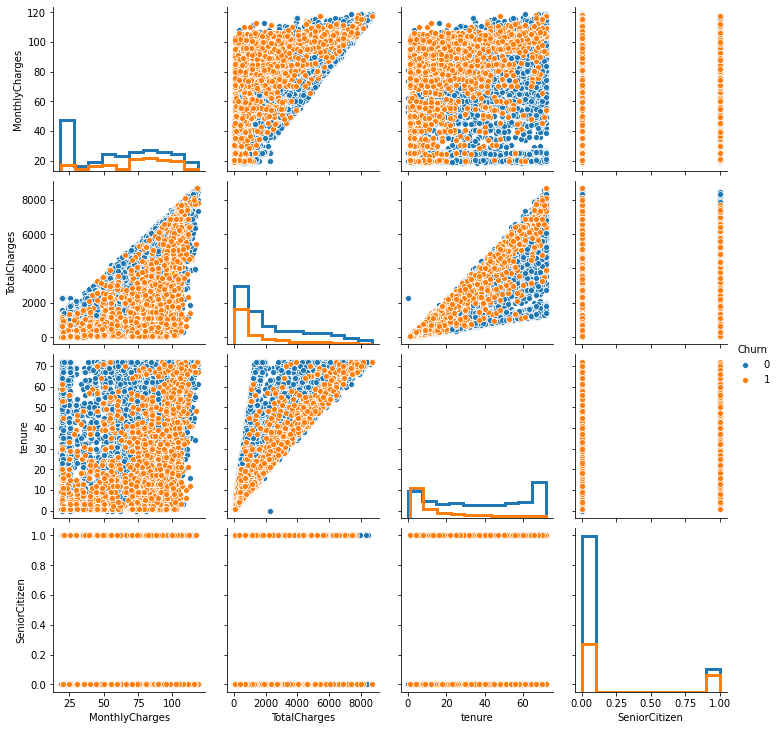

In [204]:
g = sns.PairGrid(data_new[continuous_variables],hue = 'Churn')
g = g.map_diag(plt.hist,histtype="step", linewidth=3)
g = g.map_offdiag(sns.scatterplot)
g.add_legend()

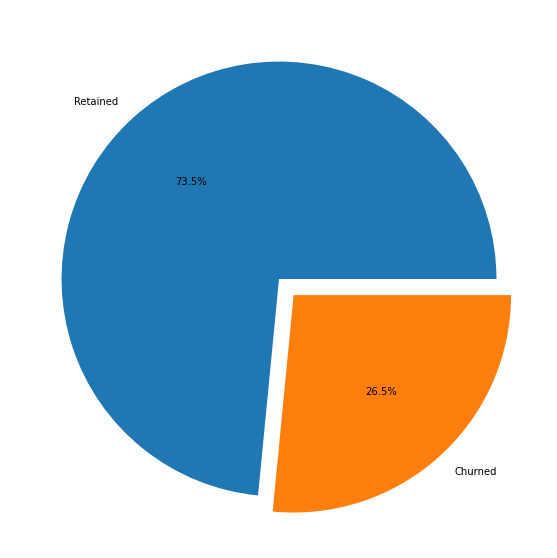

In [206]:
plt.rcParams['figure.figsize'] = (10,10)
tot_retained, tot_churned = output_data.value_counts()
plt.pie([tot_retained/len(output_data),tot_churned/len(output_data)],labels = ['Retained','Churned'],autopct='%1.1f%%',explode =(0,0.1))
plt.show()

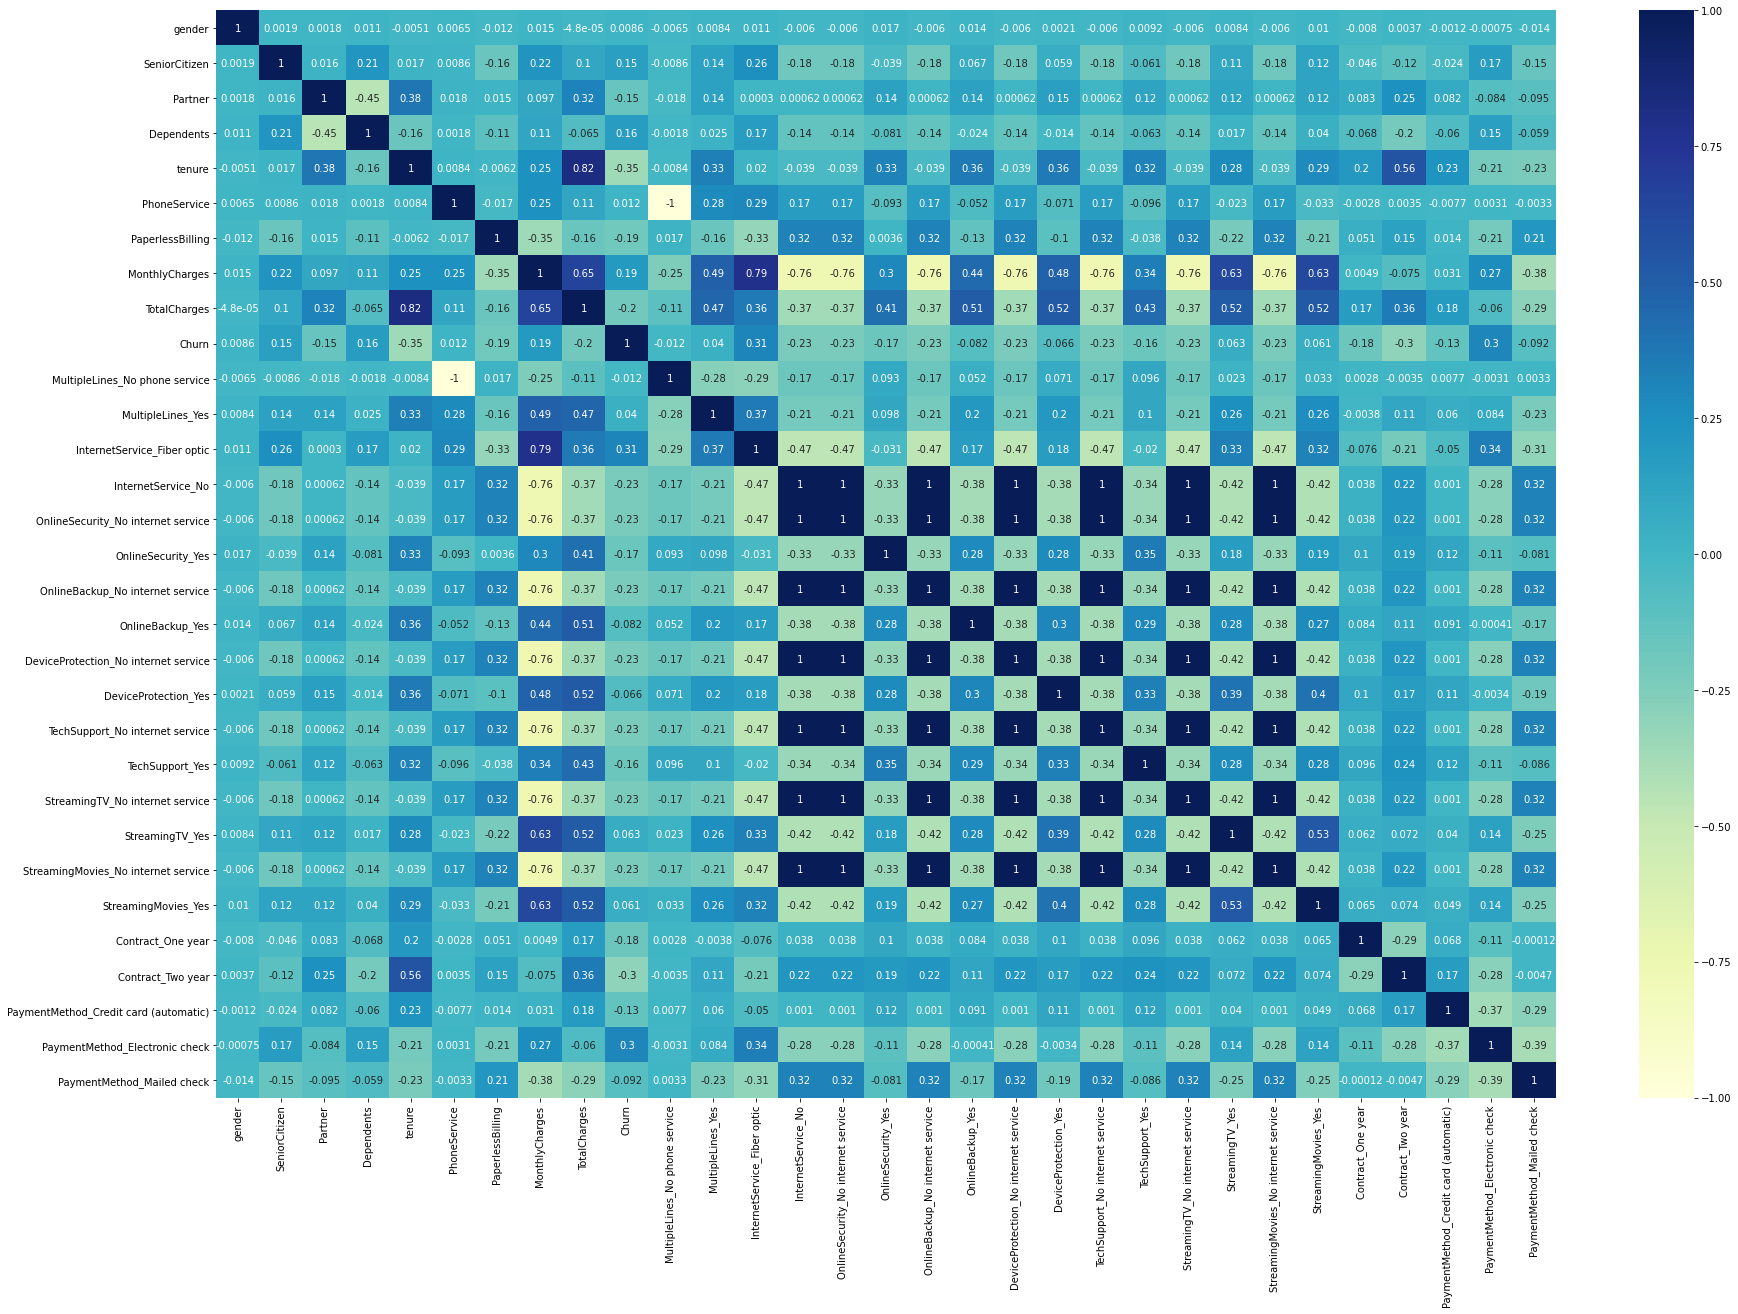

In [207]:
plt.rcParams['figure.figsize'] = (30,20)
sns.heatmap(data_new.corr(),cmap='YlGnBu',annot=True)

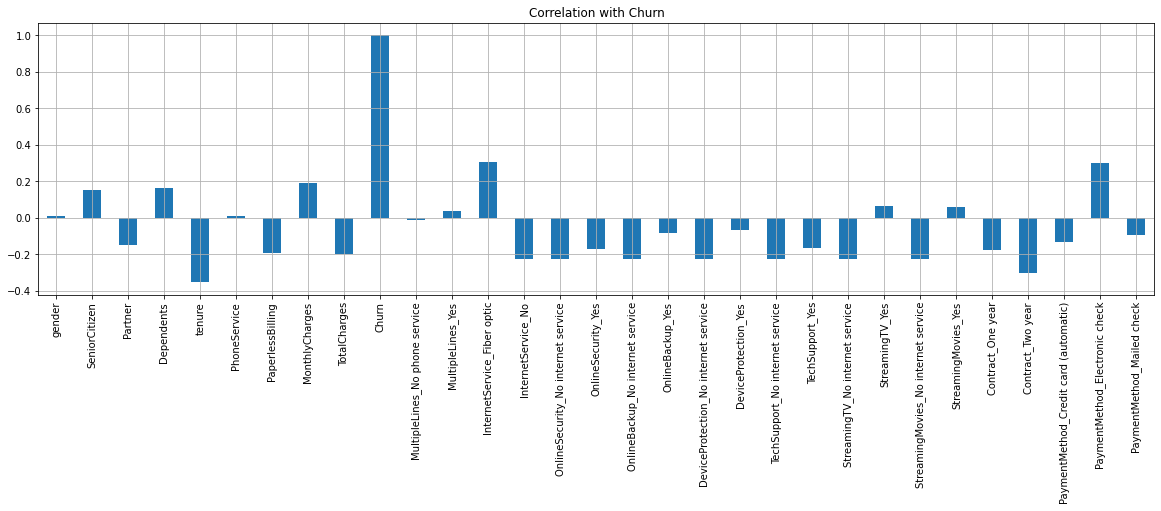

In [226]:
data_new.corrwith(data_new.Churn).plot.bar(
        figsize = (20, 5), title = "Correlation with Churn", fontsize = 10,
        rot = 90, grid = True)

In [246]:
data_train = data_new[['tenure','PaperlessBilling','MonthlyCharges','TotalCharges','InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service',
                      'StreamingMovies_No internet service','Contract_Two year','PaymentMethod_Electronic check','Churn']]

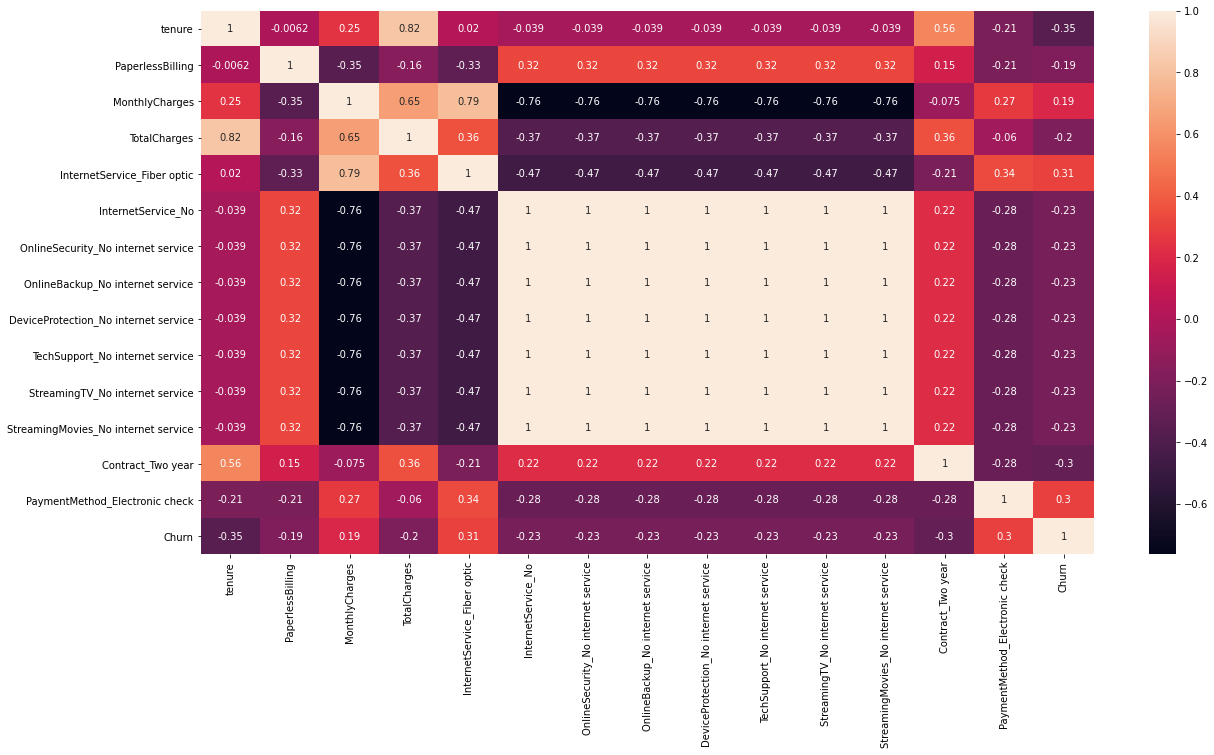

In [247]:
plt.rcParams['figure.figsize'] = (20,10)
sns.heatmap(data_train.corr(),annot=True)

In [248]:
# Model 1 : Logistic Regression 

from sklearn.preprocessing import MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import confusion_matrix,plot_roc_curve,precision_recall_fscore_support,recall_score


In [270]:
data_train.drop('Churn',inplace = True,axis = 1)

In [271]:
X_train,X_test,Y_train,Y_test = train_test_split(data_train,output_data,test_size = 0.10,random_state = 42,shuffle = True)

In [273]:
scaler = RobustScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=data_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns = data_train.columns)

In [274]:
logit = LogisticRegressionCV()

lr = logit.fit(X_train_scaled,Y_train)

Y_pred = lr.predict(X_test_scaled)

In [275]:
confusion_matrix(Y_pred,Y_test)

array([[468,  88],
       [ 43, 106]])

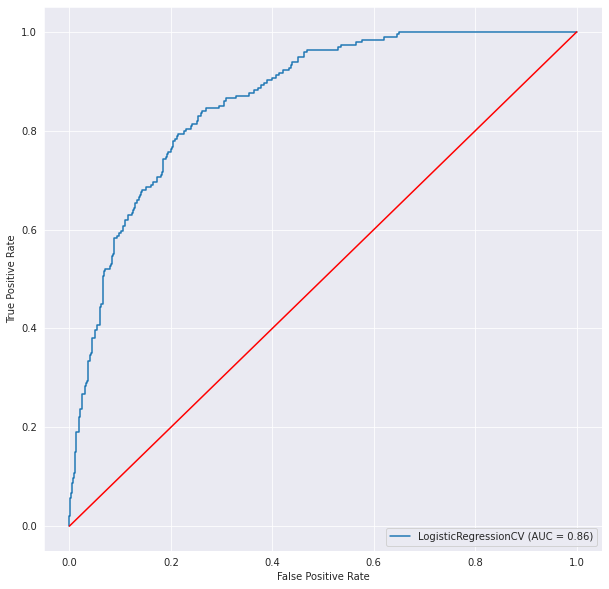

In [276]:
plt.rcParams['figure.figsize'] = (10,10)
sns.set_style('darkgrid')
plot_roc_curve(lr,X_test_scaled,Y_test)
plt.plot([0,1],[0,1],color = 'r')
plt.show()

In [277]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,InternetService_No,inf
6,OnlineSecurity_No internet service,inf
7,OnlineBackup_No internet service,inf
8,DeviceProtection_No internet service,inf
9,TechSupport_No internet service,inf
10,StreamingTV_No internet service,inf
11,StreamingMovies_No internet service,inf
3,TotalCharges,8.10
2,MonthlyCharges,7.13
0,tenure,5.45


In [281]:
data_train_2 = data_train[['TotalCharges','MonthlyCharges','tenure','InternetService_Fiber optic','Contract_Two year','PaperlessBilling','PaymentMethod_Electronic check']]

In [289]:
X_train_2,X_test_2,Y_train_2,Y_test_2 = train_test_split(data_train_2,output_data,test_size = 0.10,random_state = 42,shuffle = True)
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_2),columns=data_train_2.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test_2),columns = data_train_2.columns)

logit = LogisticRegressionCV()
lr2 = logit.fit(X_train_scaled,Y_train_2)
Y_pred_train_2 = lr2.predict(X_train_scaled)
Y_pred_test_2 = lr2.predict(X_test_scaled)
confusion_matrix(Y_pred_test_2,Y_test_2)

array([[467,  90],
       [ 44, 104]])

In [290]:
confusion_matrix(Y_pred_train_2,Y_train_2)

array([[4236,  895],
       [ 427,  780]])

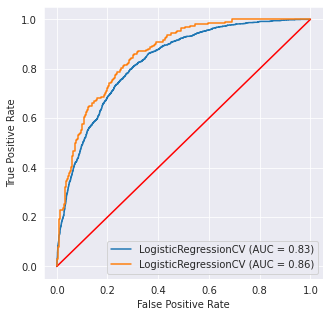

In [310]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
plt.rcParams['figure.figsize'] = (5,5)
fig,axs = plt.subplots(1,1)
sns.set_style('darkgrid')

plot_roc_curve(lr2,X_train_scaled,Y_train_2,ax = axs)
axs.plot([0,1],[0,1],color = 'r')
plot_roc_curve(lr2,X_test_scaled,Y_test_2,ax = axs)
plt.show()

In [287]:
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values, i) for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalCharges,8.08
2,tenure,5.43
1,MonthlyCharges,3.13
3,InternetService_Fiber optic,2.90
4,Contract_Two year,1.97
5,PaperlessBilling,1.81
6,PaymentMethod_Electronic check,1.65
